In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

## This is more on the IQ example.
### Assume IQ is normally distributed.

### &mu; (The Mean) is <u>100</u> and the &sigma; (The Standard Deviation) is <u>15</u>
<ul type="A">
    <li> A) Find the probability that a random person will have an IQ between 83 and 120.</li>
    <li> B) Find the probability that a random person will have an IQ between 105 and 130.</li>
    <li> C) Find the probability that a random person will have an IQ between 70 and 90.</li>
    <li> D) Find the probability that a random person will have an IQ below 81.</li>
    <li> E) Find the probability that the average IQ from a <u>sample size</u> of 30 will be IQ above 105.</li>
    <li> F) Find the probability that a random person will have an IQ below 90 or above 120.</li>
    <li> G) Find the cutoff IQ score for the top 5% of people.</li>
</ul>

In [2]:
mu = 100
sigma = 15

In [3]:
def z_score(x,mu,sigma):
    return (x-mu)/sigma

In [4]:
def p_value(z_score):
    return round(norm.cdf(z_score),4)

In [5]:
def p_to_z(p_value):
    return norm.ppf(p_value)

In [6]:
def one_tail_z_table(z_score):
    """
    This is because I'm tutoring someone whose teacher gave her a Z-table with Z-Scores from 0 to 3.
    """
    p = p_value(z_score)
    if p < 0.5:
        return 0.5 - p
    else:
         return p - 0.5

## Your Z-table only uses positive Z-scores.
## Therefore, your P-values will only be from 0% to 50%.
### You will need to know:
<ul>
    <li>When to add 50%</li>
    <li>When to subtract 50%</li>
    <li>When to combine probabilities</li>
    <li>When to subtract probabilities</li>
    <li>When to know if your Z-score is negative</li>
</ul>

### An example of your Z-table is shown below:

| Z   | 0.00   | 0.01   | 0.02   | 0.03   |
|-----|--------|--------|--------|--------|
| 0.0 | 0.0000 | 0.0040 | 0.0080 | 0.0120 |
| 0.1 | 0.0398 | 0.0438 | 0.0478 | 0.0517 |
| 0.2 | 0.0793 | 0.0832 | 0.0871 | 0.0910 |

### If you're searching for the P-value associated with a Z-score of 0.22, break it down into two pieces: 0.2 (left axis) + 0.02 (top axis)

<table>
    <thead>
        <tr>
            <th>Z</th>
            <th>0.00</th>
            <th>0.01</th>
            <th style="background-color:yellow;">0.02</th>
            <th>0.03</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>0.0</th>
            <th>0.0000</th>
            <th>0.0040</th>
            <th>0.0080</th>
            <th>0.0120</th>
        </tr>
        <tr>
            <th>0.1</th>
            <th>0.0398</th>
            <th>0.0438</th>
            <th>0.0478</th>
            <th>0.0517</th>
        </tr>
        <tr>
            <th style="background-color:yellow;">0.2</th>
            <th>0.0793</th>
            <th>0.0832</th>
            <th style="background-color:tomato;">0.0871</th>
            <th>0.0910</th>
        </tr>
    </tbody>
</table>

### The P-value of the Z-score 0.22 is: 0.0871 or 8.71%
_______________________________
## If you already have a P-value and are finding a "cutoff" point, you need to reverse the process.
### Example: the top 1% of IQs gives you a P-value of 0.99 = Z-score of 2.33

<table>
    <thead>
        <p>Don't forget about adding 50% to these values<p>
        <tr>
            <th>Z</th>
            <th>0.00</th>
            <th>0.01</th>
            <th>0.02</th>
            <th style="background-color:tomato;">0.03</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>2.2</th>
            <th>0.4861</th>
            <th>0.4864</th>
            <th>0.4868</th>
            <th>0.4871</th>
        </tr>
        <tr>
            <th style="background-color:tomato;">2.3</th>
            <th>0.4893</th>
            <th>0.4896</th>
            <th>0.4898</th>
            <th style="background-color:yellow;">0.4901</th>
        </tr>
        <tr>
            <th>2.4</th>
            <th>0.4918</th>
            <th>0.4920</th>
            <th>0.4922</th>
            <th>0.4925</th>
        </tr>
    </tbody>
</table>

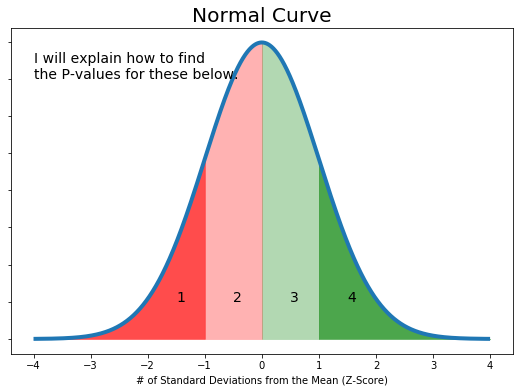

In [7]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')

x_1 = np.arange(-4, 4, .001)
# x_2 = np.arange(120, mu + sigma * 4, 1)

y_1 = norm.pdf(x_1, 0, 1)
# y_2 = norm.pdf(x_2, mu, sigma)

# x_all = np.arange(mu - sigma * 4 ,
#                   mu + sigma * 4,
#                   1)
# y_all = norm.pdf(x_all, mu, sigma)

ax.plot(x_1,y_1)
ax.fill_between(np.arange(0,1,0.001),norm.pdf(np.arange(0,1,0.001),0,1),0,color='g',alpha=0.3)
ax.fill_between(np.arange(-1,0,0.001),norm.pdf(np.arange(-1,0,0.001),0,1),0,color='r',alpha=0.3)
ax.fill_between(np.arange(1,4,0.001),norm.pdf(np.arange(1,4,0.001),0,1),0,color='g',alpha=0.7)
ax.fill_between(np.arange(-4,-1,0.001),norm.pdf(np.arange(-4,-1,0.001),0,1),0,color='r',alpha=0.7)

ax.annotate("1",[-1.5,0.05])
ax.annotate("2",[-0.5,0.05])
ax.annotate("3",[0.5,0.05])
ax.annotate("4",[1.5,0.05])

ax.annotate("I will explain how to find\nthe P-values for these below.",[-4,0.35])

ax.set_xlabel('# of Standard Deviations from the Mean (Z-Score)')
ax.set_yticklabels([])
ax.set_title('Normal Curve')
plt.show()

#### Section 1 and Section 4 have the same probability of occuring.
#### Section 2 and Section 3 have the same probability of occuring.
#### Use the Z-score of <u>1.00</u> to find a P-value on the Z-table.
<br>
That will give you the probability of Section 3. (0.3413 or 34.13%)
<br>
To get the probability of Section 4, subtract the P-value of Section 3 from 50%. (0.1587 or 15.87%)

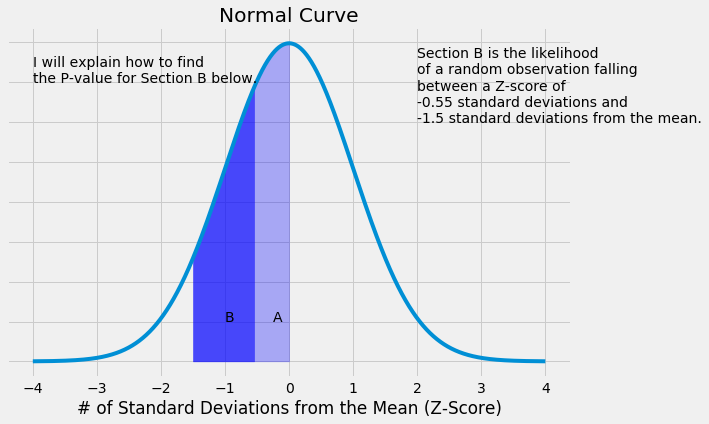

In [8]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')

x_1 = np.arange(-4, 4, .001)
# x_2 = np.arange(120, mu + sigma * 4, 1)

y_1 = norm.pdf(x_1, 0, 1)
# y_2 = norm.pdf(x_2, mu, sigma)

# x_all = np.arange(mu - sigma * 4 ,
#                   mu + sigma * 4,
#                   1)
# y_all = norm.pdf(x_all, mu, sigma)

ax.plot(x_1,y_1)
ax.fill_between(np.arange(-0.55,0,0.001),norm.pdf(np.arange(-0.55,0,0.001),0,1),0,color='b',alpha=0.3)

ax.fill_between(np.arange(-1.5,-0.55,0.001),norm.pdf(np.arange(-1.5,-0.55,0.001),0,1),0,color='b',alpha=0.7)

ax.annotate("A",[-0.25,0.05])
ax.annotate("B",[-1,0.05])

ax.annotate("I will explain how to find\nthe P-value for Section B below.",[-4,0.35])
ax.annotate("Section B is the likelihood\nof a random observation falling\nbetween a Z-score of\n-0.55 standard deviations and\n-1.5 standard deviations from the mean.",[2,0.3])

ax.set_xlabel('# of Standard Deviations from the Mean (Z-Score)')
ax.set_yticklabels([])
ax.set_title('Normal Curve')
plt.show()

### Section A is $$P(-0.55 < Z < 0)$$ 
### and Section B is $$P(-1.5 < Z < -0.55)$$
### Your Z-table allows to find the P-value for Section A + B and Section A, but NOT Section B outright.
#### So we must subtract using this method:
$$Section B = Section (A + B) - Section A$$
$$P(-1.5 < Z < -0.55) = P(-1.5 < Z < 0) - P(-0.55 < Z < 0)$$
### Now you find both P-values on the right-hand side of the equation above:

$$P(-1.5 < Z < -0.55) = 0.4332 - 0.2088 = 22.44\%$$

### I provided a table below to help you find the same values I did:

In [9]:
from IPython.core.display import HTML,display

HTML("""<table border="0" align="center" cellspacing="10" cellpadding="10"  style="border: 1px solid black;">
				<tbody style="border: 1px solid black;"><tr>
					<th align="center" bgcolor="#003366"><font style="color:white; text-align:center;" class="larger">Z</font></th>
					<th style="background-color:yellow;">0.00</th>
					<th >0.01</th>
					<th >0.02</th>
					<th >0.03</th>
					<th >0.04</th>
					<th style="background-color:yellow;">0.05</th>
					<th >0.06</th>
					<th >0.07</th>
					<th >0.08</th>
					<th >0.09</th>
				</tr>
				<tr>
					<th >0.0</th>
					<td style="text-align:center;border: 1px solid black;" >0.0000</td>
					<td style="text-align:center;border: 1px solid black;" >0.0040</td>
					<td style="text-align:center;border: 1px solid black;" >0.0080</td>
					<td style="text-align:center;border: 1px solid black;" >0.0120</td>
					<td style="text-align:center;border: 1px solid black;" >0.0160</td>
					<td style="text-align:center;border: 1px solid black;" >0.0199</td>
					<td style="text-align:center;border: 1px solid black;" >0.0239</td>
					<td style="text-align:center;border: 1px solid black;" >0.0279</td>
					<td style="text-align:center;border: 1px solid black;" >0.0319</td>
					<td style="text-align:center;border: 1px solid black;" >0.0359</td>
				</tr>
				<tr>
					<th >0.1</th>
					<td style="text-align:center;border: 1px solid black;" >0.0398</td>
					<td style="text-align:center;border: 1px solid black;" >0.0438</td>
					<td style="text-align:center;border: 1px solid black;" >0.0478</td>
					<td style="text-align:center;border: 1px solid black;" >0.0517</td>
					<td style="text-align:center;border: 1px solid black;" >0.0557</td>
					<td style="text-align:center;border: 1px solid black;" >0.0596</td>
					<td style="text-align:center;border: 1px solid black;" >0.0636</td>
					<td style="text-align:center;border: 1px solid black;" >0.0675</td>
					<td style="text-align:center;border: 1px solid black;" >0.0714</td>
					<td style="text-align:center;border: 1px solid black;" >0.0753</td>
				</tr>
				<tr>
					<th >0.2</th>
					<td style="text-align:center;border: 1px solid black;" >0.0793</td>
					<td style="text-align:center;border: 1px solid black;" >0.0832</td>
					<td style="text-align:center;border: 1px solid black;" >0.0871</td>
					<td style="text-align:center;border: 1px solid black;" >0.0910</td>
					<td style="text-align:center;border: 1px solid black;" >0.0948</td>
					<td style="text-align:center;border: 1px solid black;" >0.0987</td>
					<td style="text-align:center;border: 1px solid black;" >0.1026</td>
					<td style="text-align:center;border: 1px solid black;" >0.1064</td>
					<td style="text-align:center;border: 1px solid black;" >0.1103</td>
					<td style="text-align:center;border: 1px solid black;" >0.1141</td>
				</tr>
				<tr>
					<th >0.3</th>
					<td style="text-align:center;border: 1px solid black;" >0.1179</td>
					<td style="text-align:center;border: 1px solid black;" >0.1217</td>
					<td style="text-align:center;border: 1px solid black;" >0.1255</td>
					<td style="text-align:center;border: 1px solid black;" >0.1293</td>
					<td style="text-align:center;border: 1px solid black;" >0.1331</td>
					<td style="text-align:center;border: 1px solid black;" >0.1368</td>
					<td style="text-align:center;border: 1px solid black;" >0.1406</td>
					<td style="text-align:center;border: 1px solid black;" >0.1443</td>
					<td style="text-align:center;border: 1px solid black;" >0.1480</td>
					<td style="text-align:center;border: 1px solid black;" >0.1517</td>
				</tr>
				<tr>
					<th >0.4</th>
					<td style="text-align:center;border: 1px solid black;" >0.1554</td>
					<td style="text-align:center;border: 1px solid black;" >0.1591</td>
					<td style="text-align:center;border: 1px solid black;" >0.1628</td>
					<td style="text-align:center;border: 1px solid black;" >0.1664</td>
					<td style="text-align:center;border: 1px solid black;" >0.1700</td>
					<td style="text-align:center;border: 1px solid black;" >0.1736</td>
					<td style="text-align:center;border: 1px solid black;" >0.1772</td>
					<td style="text-align:center;border: 1px solid black;" >0.1808</td>
					<td style="text-align:center;border: 1px solid black;" >0.1844</td>
					<td style="text-align:center;border: 1px solid black;" >0.1879</td>
				</tr>
				<tr>
					<th style="background-color:yellow;">0.5</th>
					<td style="text-align:center;border: 1px solid black;" >0.1915</td>
					<td style="text-align:center;border: 1px solid black;" >0.1950</td>
					<td style="text-align:center;border: 1px solid black;" >0.1985</td>
					<td style="text-align:center;border: 1px solid black;" >0.2019</td>
					<td style="text-align:center;border: 1px solid black;" >0.2054</td>
					<td style="text-align:center;border: 1px solid black;background-color:tomato;">0.2088</td>
					<td style="text-align:center;border: 1px solid black;" >0.2123</td>
					<td style="text-align:center;border: 1px solid black;" >0.2157</td>
					<td style="text-align:center;border: 1px solid black;" >0.2190</td>
					<td style="text-align:center;border: 1px solid black;" >0.2224</td>
				</tr>
				<tr>
					<th >0.6</th>
					<td style="text-align:center;border: 1px solid black;" >0.2257</td>
					<td style="text-align:center;border: 1px solid black;" >0.2291</td>
					<td style="text-align:center;border: 1px solid black;" >0.2324</td>
					<td style="text-align:center;border: 1px solid black;" >0.2357</td>
					<td style="text-align:center;border: 1px solid black;" >0.2389</td>
					<td style="text-align:center;border: 1px solid black;" >0.2422</td>
					<td style="text-align:center;border: 1px solid black;" >0.2454</td>
					<td style="text-align:center;border: 1px solid black;" >0.2486</td>
					<td style="text-align:center;border: 1px solid black;" >0.2517</td>
					<td style="text-align:center;border: 1px solid black;" >0.2549</td>
				</tr>
				<tr>
					<th >0.7</th>
					<td style="text-align:center;border: 1px solid black;" >0.2580</td>
					<td style="text-align:center;border: 1px solid black;" >0.2611</td>
					<td style="text-align:center;border: 1px solid black;" >0.2642</td>
					<td style="text-align:center;border: 1px solid black;" >0.2673</td>
					<td style="text-align:center;border: 1px solid black;" >0.2704</td>
					<td style="text-align:center;border: 1px solid black;" >0.2734</td>
					<td style="text-align:center;border: 1px solid black;" >0.2764</td>
					<td style="text-align:center;border: 1px solid black;" >0.2794</td>
					<td style="text-align:center;border: 1px solid black;" >0.2823</td>
					<td style="text-align:center;border: 1px solid black;" >0.2852</td>
				</tr>
				<tr>
					<th >0.8</th>
					<td style="text-align:center;border: 1px solid black;" >0.2881</td>
					<td style="text-align:center;border: 1px solid black;" >0.2910</td>
					<td style="text-align:center;border: 1px solid black;" >0.2939</td>
					<td style="text-align:center;border: 1px solid black;" >0.2967</td>
					<td style="text-align:center;border: 1px solid black;" >0.2995</td>
					<td style="text-align:center;border: 1px solid black;" >0.3023</td>
					<td style="text-align:center;border: 1px solid black;" >0.3051</td>
					<td style="text-align:center;border: 1px solid black;" >0.3078</td>
					<td style="text-align:center;border: 1px solid black;" >0.3106</td>
					<td style="text-align:center;border: 1px solid black;" >0.3133</td>
				</tr>
				<tr>
					<th >0.9</th>
					<td style="text-align:center;border: 1px solid black;" >0.3159</td>
					<td style="text-align:center;border: 1px solid black;" >0.3186</td>
					<td style="text-align:center;border: 1px solid black;" >0.3212</td>
					<td style="text-align:center;border: 1px solid black;" >0.3238</td>
					<td style="text-align:center;border: 1px solid black;" >0.3264</td>
					<td style="text-align:center;border: 1px solid black;" >0.3289</td>
					<td style="text-align:center;border: 1px solid black;" >0.3315</td>
					<td style="text-align:center;border: 1px solid black;" >0.3340</td>
					<td style="text-align:center;border: 1px solid black;" >0.3365</td>
					<td style="text-align:center;border: 1px solid black;" >0.3389</td>
				</tr>
				<tr>
					<th >1.0</th>
					<td style="text-align:center;border: 1px solid black;" >0.3413</td>
					<td style="text-align:center;border: 1px solid black;" >0.3438</td>
					<td style="text-align:center;border: 1px solid black;" >0.3461</td>
					<td style="text-align:center;border: 1px solid black;" >0.3485</td>
					<td style="text-align:center;border: 1px solid black;" >0.3508</td>
					<td style="text-align:center;border: 1px solid black;" >0.3531</td>
					<td style="text-align:center;border: 1px solid black;" >0.3554</td>
					<td style="text-align:center;border: 1px solid black;" >0.3577</td>
					<td style="text-align:center;border: 1px solid black;" >0.3599</td>
					<td style="text-align:center;border: 1px solid black;" >0.3621</td>
				</tr>
				<tr>
					<th >1.1</th>
					<td style="text-align:center;border: 1px solid black;" >0.3643</td>
					<td style="text-align:center;border: 1px solid black;" >0.3665</td>
					<td style="text-align:center;border: 1px solid black;" >0.3686</td>
					<td style="text-align:center;border: 1px solid black;" >0.3708</td>
					<td style="text-align:center;border: 1px solid black;" >0.3729</td>
					<td style="text-align:center;border: 1px solid black;" >0.3749</td>
					<td style="text-align:center;border: 1px solid black;" >0.3770</td>
					<td style="text-align:center;border: 1px solid black;" >0.3790</td>
					<td style="text-align:center;border: 1px solid black;" >0.3810</td>
					<td style="text-align:center;border: 1px solid black;" >0.3830</td>
				</tr>
				<tr>
					<th >1.2</th>
					<td style="text-align:center;border: 1px solid black;" >0.3849</td>
					<td style="text-align:center;border: 1px solid black;" >0.3869</td>
					<td style="text-align:center;border: 1px solid black;" >0.3888</td>
					<td style="text-align:center;border: 1px solid black;" >0.3907</td>
					<td style="text-align:center;border: 1px solid black;" >0.3925</td>
					<td style="text-align:center;border: 1px solid black;" >0.3944</td>
					<td style="text-align:center;border: 1px solid black;" >0.3962</td>
					<td style="text-align:center;border: 1px solid black;" >0.3980</td>
					<td style="text-align:center;border: 1px solid black;" >0.3997</td>
					<td style="text-align:center;border: 1px solid black;" >0.4015</td>
				</tr>
				<tr>
					<th >1.3</th>
					<td style="text-align:center;border: 1px solid black;" >0.4032</td>
					<td style="text-align:center;border: 1px solid black;" >0.4049</td>
					<td style="text-align:center;border: 1px solid black;" >0.4066</td>
					<td style="text-align:center;border: 1px solid black;" >0.4082</td>
					<td style="text-align:center;border: 1px solid black;" >0.4099</td>
					<td style="text-align:center;border: 1px solid black;" >0.4115</td>
					<td style="text-align:center;border: 1px solid black;" >0.4131</td>
					<td style="text-align:center;border: 1px solid black;" >0.4147</td>
					<td style="text-align:center;border: 1px solid black;" >0.4162</td>
					<td style="text-align:center;border: 1px solid black;" >0.4177</td>
				</tr>
				<tr>
					<th >1.4</th>
					<td style="text-align:center;border: 1px solid black;" >0.4192</td>
					<td style="text-align:center;border: 1px solid black;" >0.4207</td>
					<td style="text-align:center;border: 1px solid black;" >0.4222</td>
					<td style="text-align:center;border: 1px solid black;" >0.4236</td>
					<td style="text-align:center;border: 1px solid black;" >0.4251</td>
					<td style="text-align:center;border: 1px solid black;" >0.4265</td>
					<td style="text-align:center;border: 1px solid black;" >0.4279</td>
					<td style="text-align:center;border: 1px solid black;" >0.4292</td>
					<td style="text-align:center;border: 1px solid black;" >0.4306</td>
					<td style="text-align:center;border: 1px solid black;" >0.4319</td>
				</tr>
				<tr>
					<th style="background-color:yellow;">1.5</th>
					<td style="text-align:center;border: 1px solid black;background-color:tomato;">0.4332</td>
					<td style="text-align:center;border: 1px solid black;" >0.4345</td>
					<td style="text-align:center;border: 1px solid black;" >0.4357</td>
					<td style="text-align:center;border: 1px solid black;" >0.4370</td>
					<td style="text-align:center;border: 1px solid black;" >0.4382</td>
					<td style="text-align:center;border: 1px solid black;" >0.4394</td>
					<td style="text-align:center;border: 1px solid black;" >0.4406</td>
					<td style="text-align:center;border: 1px solid black;" >0.4418</td>
					<td style="text-align:center;border: 1px solid black;" >0.4429</td>
					<td style="text-align:center;border: 1px solid black;" >0.4441</td>
				</tr>
				<tr>
					<th >1.6</th>
					<td style="text-align:center;border: 1px solid black;" >0.4452</td>
					<td style="text-align:center;border: 1px solid black;" >0.4463</td>
					<td style="text-align:center;border: 1px solid black;" >0.4474</td>
					<td style="text-align:center;border: 1px solid black;" >0.4484</td>
					<td style="text-align:center;border: 1px solid black;" >0.4495</td>
					<td style="text-align:center;border: 1px solid black;" >0.4505</td>
					<td style="text-align:center;border: 1px solid black;" >0.4515</td>
					<td style="text-align:center;border: 1px solid black;" >0.4525</td>
					<td style="text-align:center;border: 1px solid black;" >0.4535</td>
					<td style="text-align:center;border: 1px solid black;" >0.4545</td>
				</tr>
				<tr>
					<th >1.7</th>
					<td style="text-align:center;border: 1px solid black;" >0.4554</td>
					<td style="text-align:center;border: 1px solid black;" >0.4564</td>
					<td style="text-align:center;border: 1px solid black;" >0.4573</td>
					<td style="text-align:center;border: 1px solid black;" >0.4582</td>
					<td style="text-align:center;border: 1px solid black;" >0.4591</td>
					<td style="text-align:center;border: 1px solid black;" >0.4599</td>
					<td style="text-align:center;border: 1px solid black;" >0.4608</td>
					<td style="text-align:center;border: 1px solid black;" >0.4616</td>
					<td style="text-align:center;border: 1px solid black;" >0.4625</td>
					<td style="text-align:center;border: 1px solid black;" >0.4633</td>
				</tr>
				<tr>
					<th >1.8</th>
					<td style="text-align:center;border: 1px solid black;" >0.4641</td>
					<td style="text-align:center;border: 1px solid black;" >0.4649</td>
					<td style="text-align:center;border: 1px solid black;" >0.4656</td>
					<td style="text-align:center;border: 1px solid black;" >0.4664</td>
					<td style="text-align:center;border: 1px solid black;" >0.4671</td>
					<td style="text-align:center;border: 1px solid black;" >0.4678</td>
					<td style="text-align:center;border: 1px solid black;" >0.4686</td>
					<td style="text-align:center;border: 1px solid black;" >0.4693</td>
					<td style="text-align:center;border: 1px solid black;" >0.4699</td>
					<td style="text-align:center;border: 1px solid black;" >0.4706</td>
				</tr>
				<tr>
					<th >1.9</th>
					<td style="text-align:center;border: 1px solid black;" >0.4713</td>
					<td style="text-align:center;border: 1px solid black;" >0.4719</td>
					<td style="text-align:center;border: 1px solid black;" >0.4726</td>
					<td style="text-align:center;border: 1px solid black;" >0.4732</td>
					<td style="text-align:center;border: 1px solid black;" >0.4738</td>
					<td style="text-align:center;border: 1px solid black;" >0.4744</td>
					<td style="text-align:center;border: 1px solid black;" >0.4750</td>
					<td style="text-align:center;border: 1px solid black;" >0.4756</td>
					<td style="text-align:center;border: 1px solid black;" >0.4761</td>
					<td style="text-align:center;border: 1px solid black;" >0.4767</td>
				</tr>
				<tr>
					<th >2.0</th>
					<td style="text-align:center;border: 1px solid black;" >0.4772</td>
					<td style="text-align:center;border: 1px solid black;" >0.4778</td>
					<td style="text-align:center;border: 1px solid black;" >0.4783</td>
					<td style="text-align:center;border: 1px solid black;" >0.4788</td>
					<td style="text-align:center;border: 1px solid black;" >0.4793</td>
					<td style="text-align:center;border: 1px solid black;" >0.4798</td>
					<td style="text-align:center;border: 1px solid black;" >0.4803</td>
					<td style="text-align:center;border: 1px solid black;" >0.4808</td>
					<td style="text-align:center;border: 1px solid black;" >0.4812</td>
					<td style="text-align:center;border: 1px solid black;" >0.4817</td>
				</tr>
				<tr>
					<th >2.1</th>
					<td style="text-align:center;border: 1px solid black;" >0.4821</td>
					<td style="text-align:center;border: 1px solid black;" >0.4826</td>
					<td style="text-align:center;border: 1px solid black;" >0.4830</td>
					<td style="text-align:center;border: 1px solid black;" >0.4834</td>
					<td style="text-align:center;border: 1px solid black;" >0.4838</td>
					<td style="text-align:center;border: 1px solid black;" >0.4842</td>
					<td style="text-align:center;border: 1px solid black;" >0.4846</td>
					<td style="text-align:center;border: 1px solid black;" >0.4850</td>
					<td style="text-align:center;border: 1px solid black;" >0.4854</td>
					<td style="text-align:center;border: 1px solid black;" >0.4857</td>
				</tr>
				<tr>
					<th >2.2</th>
					<td style="text-align:center;border: 1px solid black;" >0.4861</td>
					<td style="text-align:center;border: 1px solid black;" >0.4864</td>
					<td style="text-align:center;border: 1px solid black;" >0.4868</td>
					<td style="text-align:center;border: 1px solid black;" >0.4871</td>
					<td style="text-align:center;border: 1px solid black;" >0.4875</td>
					<td style="text-align:center;border: 1px solid black;" >0.4878</td>
					<td style="text-align:center;border: 1px solid black;" >0.4881</td>
					<td style="text-align:center;border: 1px solid black;" >0.4884</td>
					<td style="text-align:center;border: 1px solid black;" >0.4887</td>
					<td style="text-align:center;border: 1px solid black;" >0.4890</td>
				</tr>
				<tr>
					<th >2.3</th>
					<td style="text-align:center;border: 1px solid black;" >0.4893</td>
					<td style="text-align:center;border: 1px solid black;" >0.4896</td>
					<td style="text-align:center;border: 1px solid black;" >0.4898</td>
					<td style="text-align:center;border: 1px solid black;" >0.4901</td>
					<td style="text-align:center;border: 1px solid black;" >0.4904</td>
					<td style="text-align:center;border: 1px solid black;" >0.4906</td>
					<td style="text-align:center;border: 1px solid black;" >0.4909</td>
					<td style="text-align:center;border: 1px solid black;" >0.4911</td>
					<td style="text-align:center;border: 1px solid black;" >0.4913</td>
					<td style="text-align:center;border: 1px solid black;" >0.4916</td>
				</tr>
				<tr>
					<th >2.4</th>
					<td style="text-align:center;border: 1px solid black;" >0.4918</td>
					<td style="text-align:center;border: 1px solid black;" >0.4920</td>
					<td style="text-align:center;border: 1px solid black;" >0.4922</td>
					<td style="text-align:center;border: 1px solid black;" >0.4925</td>
					<td style="text-align:center;border: 1px solid black;" >0.4927</td>
					<td style="text-align:center;border: 1px solid black;" >0.4929</td>
					<td style="text-align:center;border: 1px solid black;" >0.4931</td>
					<td style="text-align:center;border: 1px solid black;" >0.4932</td>
					<td style="text-align:center;border: 1px solid black;" >0.4934</td>
					<td style="text-align:center;border: 1px solid black;" >0.4936</td>
				</tr>
				<tr>
					<th >2.5</th>
					<td style="text-align:center;border: 1px solid black;" >0.4938</td>
					<td style="text-align:center;border: 1px solid black;" >0.4940</td>
					<td style="text-align:center;border: 1px solid black;" >0.4941</td>
					<td style="text-align:center;border: 1px solid black;" >0.4943</td>
					<td style="text-align:center;border: 1px solid black;" >0.4945</td>
					<td style="text-align:center;border: 1px solid black;" >0.4946</td>
					<td style="text-align:center;border: 1px solid black;" >0.4948</td>
					<td style="text-align:center;border: 1px solid black;" >0.4949</td>
					<td style="text-align:center;border: 1px solid black;" >0.4951</td>
					<td style="text-align:center;border: 1px solid black;" >0.4952</td>
				</tr>
				<tr>
					<th >2.6</th>
					<td style="text-align:center;border: 1px solid black;" >0.4953</td>
					<td style="text-align:center;border: 1px solid black;" >0.4955</td>
					<td style="text-align:center;border: 1px solid black;" >0.4956</td>
					<td style="text-align:center;border: 1px solid black;" >0.4957</td>
					<td style="text-align:center;border: 1px solid black;" >0.4959</td>
					<td style="text-align:center;border: 1px solid black;" >0.4960</td>
					<td style="text-align:center;border: 1px solid black;" >0.4961</td>
					<td style="text-align:center;border: 1px solid black;" >0.4962</td>
					<td style="text-align:center;border: 1px solid black;" >0.4963</td>
					<td style="text-align:center;border: 1px solid black;" >0.4964</td>
				</tr>
				<tr>
					<th >2.7</th>
					<td style="text-align:center;border: 1px solid black;" >0.4965</td>
					<td style="text-align:center;border: 1px solid black;" >0.4966</td>
					<td style="text-align:center;border: 1px solid black;" >0.4967</td>
					<td style="text-align:center;border: 1px solid black;" >0.4968</td>
					<td style="text-align:center;border: 1px solid black;" >0.4969</td>
					<td style="text-align:center;border: 1px solid black;" >0.4970</td>
					<td style="text-align:center;border: 1px solid black;" >0.4971</td>
					<td style="text-align:center;border: 1px solid black;" >0.4972</td>
					<td style="text-align:center;border: 1px solid black;" >0.4973</td>
					<td style="text-align:center;border: 1px solid black;" >0.4974</td>
				</tr>
				<tr>
					<th >2.8</th>
					<td style="text-align:center;border: 1px solid black;" >0.4974</td>
					<td style="text-align:center;border: 1px solid black;" >0.4975</td>
					<td style="text-align:center;border: 1px solid black;" >0.4976</td>
					<td style="text-align:center;border: 1px solid black;" >0.4977</td>
					<td style="text-align:center;border: 1px solid black;" >0.4977</td>
					<td style="text-align:center;border: 1px solid black;" >0.4978</td>
					<td style="text-align:center;border: 1px solid black;" >0.4979</td>
					<td style="text-align:center;border: 1px solid black;" >0.4979</td>
					<td style="text-align:center;border: 1px solid black;" >0.4980</td>
					<td style="text-align:center;border: 1px solid black;" >0.4981</td>
				</tr>
				<tr>
					<th >2.9</th>
					<td style="text-align:center;border: 1px solid black;" >0.4981</td>
					<td style="text-align:center;border: 1px solid black;" >0.4982</td>
					<td style="text-align:center;border: 1px solid black;" >0.4982</td>
					<td style="text-align:center;border: 1px solid black;" >0.4983</td>
					<td style="text-align:center;border: 1px solid black;" >0.4984</td>
					<td style="text-align:center;border: 1px solid black;" >0.4984</td>
					<td style="text-align:center;border: 1px solid black;" >0.4985</td>
					<td style="text-align:center;border: 1px solid black;" >0.4985</td>
					<td style="text-align:center;border: 1px solid black;" >0.4986</td>
					<td style="text-align:center;border: 1px solid black;" >0.4986</td>
				</tr>
				<tr>
					<th >3.0</th>
					<td style="text-align:center;border: 1px solid black;" >0.4987</td>
					<td style="text-align:center;border: 1px solid black;" >0.4987</td>
					<td style="text-align:center;border: 1px solid black;" >0.4987</td>
					<td style="text-align:center;border: 1px solid black;" >0.4988</td>
					<td style="text-align:center;border: 1px solid black;" >0.4988</td>
					<td style="text-align:center;border: 1px solid black;" >0.4989</td>
					<td style="text-align:center;border: 1px solid black;" >0.4989</td>
					<td style="text-align:center;border: 1px solid black;" >0.4989</td>
					<td style="text-align:center;border: 1px solid black;" >0.4990</td>
					<td style="text-align:center;border: 1px solid black;" >0.4990</td>
				</tr>
			</tbody></table>""")

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.0000,0.0040,0.0080,0.0120,0.0160,0.0199,0.0239,0.0279,0.0319,0.0359
0.1,0.0398,0.0438,0.0478,0.0517,0.0557,0.0596,0.0636,0.0675,0.0714,0.0753
0.2,0.0793,0.0832,0.0871,0.0910,0.0948,0.0987,0.1026,0.1064,0.1103,0.1141
0.3,0.1179,0.1217,0.1255,0.1293,0.1331,0.1368,0.1406,0.1443,0.1480,0.1517
0.4,0.1554,0.1591,0.1628,0.1664,0.1700,0.1736,0.1772,0.1808,0.1844,0.1879
0.5,0.1915,0.1950,0.1985,0.2019,0.2054,0.2088,0.2123,0.2157,0.2190,0.2224
0.6,0.2257,0.2291,0.2324,0.2357,0.2389,0.2422,0.2454,0.2486,0.2517,0.2549
0.7,0.2580,0.2611,0.2642,0.2673,0.2704,0.2734,0.2764,0.2794,0.2823,0.2852
0.8,0.2881,0.2910,0.2939,0.2967,0.2995,0.3023,0.3051,0.3078,0.3106,0.3133
0.9,0.3159,0.3186,0.3212,0.3238,0.3264,0.3289,0.3315,0.3340,0.3365,0.3389


## Things to ask yourself:
### Am I looking at a sample? (they give a sample size)
- Your standard deviation is $$\frac{\sigma}{\sqrt n}$$

### If they ask for the probability that a value will be <u>greater than</u> some number: $$P(X > number)$$ Where is that number in relation to the mean value?
- If that number is less than the mean: add 50% to the P-value in your table.
- If that number is greater than the mean: subtract your P-value from 50% in your table.
________________
### If they ask for the probability that a value will be <u>less than</u> some number: $$P(X < number)$$ Where is that number in relation to the mean value?
- If that number is less than the mean: subtract your P-value from 50% .
- If that number is greater than the mean: add 50% to the P-value in your table.
____________
### If they ask for the probability that a value will be <u>greater than</u> some number or <u>less than</u> some other number: 
### First find where both numbers are in relation to the mean value.
### Then ask if you're finding everything between those numbers:$$P(number < X < other\_number)$$
- If one number is below the mean and the other number is above the mean: Combine the two P-values you find in your table.$$P_1+P_2$$
- If both numbers are on the same side of the mean: subtract the smaller P-value from the larger P-value.$$Absolute\_value(P_1-P_2)$$
________________________
### Or finding everything above one number and below the other:$$P(X > number \ or \ X\ <\ other\_number)$$
- Subtract each P-value from 50% and combine those final numbers.$$(50\%-P_1)+(50\%-P_2)$$

In [10]:
# Problem A
z1 = z_score(83,mu,sigma)
p1 = one_tail_z_table(z1)

z2 = z_score(120,mu,sigma)
p2 = one_tail_z_table(z2)

ans = p1 + p2

# A) Find the probability that a random person will have an IQ between 83 and 120.
### Determine what sections you're looking at:
$$P(83 < X < 120)$$
### Convert your values to Z-scores.
$$Z_{83}=\frac{X-mean}{standard\ deviation}=\frac{83-100}{15}=-1.13$$
# 
$$Z_{120}=\frac{X-mean}{standard\ deviation}=\frac{120-100}{15}=1.33$$
### Find the P-values
$$P(-1.13 < Z < 1.33) = P(-1.13 < Z < 0) + P(0 < Z < 1.33)$$$$=0.3708+0.4082$$$$=0.7803$$

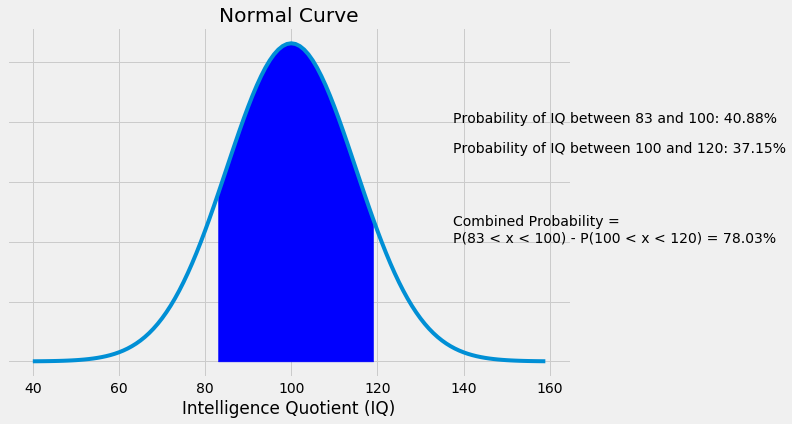

In [11]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')

x_1 = np.arange(83, 120, 1)
# x_2 = np.arange(120, mu + sigma * 4, 1)

y_1 = norm.pdf(x_1, mu, sigma)
# y_2 = norm.pdf(x_2, mu, sigma)

x_all = np.arange(mu - sigma * 4 ,
                  mu + sigma * 4,
                  1)
y_all = norm.pdf(x_all, mu, sigma)

ax.plot(x_all,y_all)
ax.fill_between(x_1,y_1,0,color='b')
# ax.fill_between(np.arange(70, mu+1, 1),norm.pdf(np.arange(70,mu+1,1),mu,sigma),0,color='b',alpha=0.3)
ax.set_xlabel('Intelligence Quotient (IQ)')
ax.set_yticklabels([])
ax.annotate("Probability of IQ between 83 and 100: {:.2f}%".format(p2 * 100), [mu + sigma * 2.5, 0.02])
ax.annotate("Probability of IQ between 100 and 120: {:.2f}%".format(p1 * 100), [mu + sigma * 2.5, 0.0175])
ax.annotate("Combined Probability = \nP(83 < x < 100) - P(100 < x < 120) = {:.2f}%".format(ans * 100), [mu + sigma * 2.5, 0.01])
ax.set_title('Normal Curve')
plt.show()

In [12]:
# Problem B
z1 = round(z_score(105,mu,sigma),2)
p1 = one_tail_z_table(z1)

z2 = z_score(130,mu,sigma)
p2 = one_tail_z_table(z2)

ans = np.abs(p1 - p2)


# B) Find the probability that a random person will have an IQ between 105 and 130.
### Determine what sections you're looking at:
$$P(105 < X < 130)$$
### Convert your values to Z-scores.
$$Z_{105}=\frac{X-mean}{standard\ deviation}=\frac{105-100}{15}=0.33$$
# 
$$Z_{130}=\frac{X-mean}{standard\ deviation}=\frac{130-100}{15}=2$$
### Find the P-values
$$P(0.33 < Z < 2) = P(0 < Z < 2) - P(0 < Z < 0.33)$$$$=0.4772-0.1293$$$$=0.3479$$

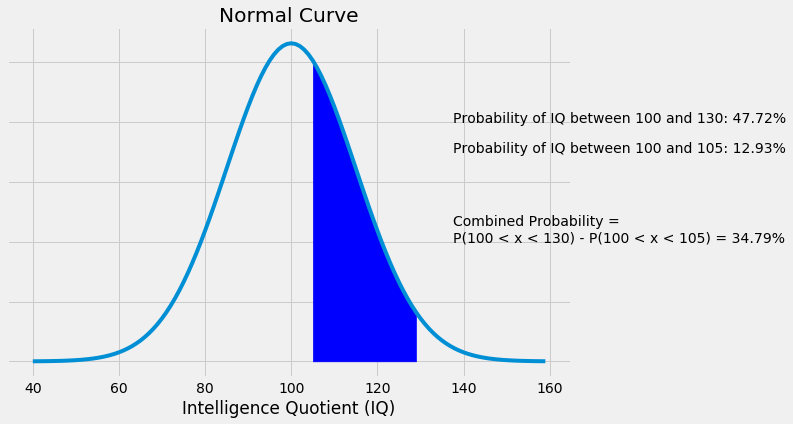

In [13]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')

x_1 = np.arange(105, 130, 1)
# x_2 = np.arange(120, mu + sigma * 4, 1)

y_1 = norm.pdf(x_1, mu, sigma)
# y_2 = norm.pdf(x_2, mu, sigma)

x_all = np.arange(mu - sigma * 4 ,
                  mu + sigma * 4,
                  1)
y_all = norm.pdf(x_all, mu, sigma)

ax.plot(x_all,y_all)
ax.fill_between(x_1,y_1,0,color='b')
# ax.fill_between(np.arange(70, mu+1, 1),norm.pdf(np.arange(70,mu+1,1),mu,sigma),0,color='b',alpha=0.3)
ax.set_xlabel('Intelligence Quotient (IQ)')
ax.set_yticklabels([])
ax.annotate("Probability of IQ between 100 and 130: {:.2f}%".format(p2 * 100), [mu + sigma * 2.5, 0.02])
ax.annotate("Probability of IQ between 100 and 105: {:.2f}%".format(p1 * 100), [mu + sigma * 2.5, 0.0175])
ax.annotate("Combined Probability = \nP(100 < x < 130) - P(100 < x < 105) = {:.2f}%".format(ans * 100), [mu + sigma * 2.5, 0.01])
ax.set_title('Normal Curve')
plt.show()

In [14]:
# Problem C
z1 = z_score(70,mu,sigma)
p1 = one_tail_z_table(z1)

z2 = round(z_score(90,mu,sigma),2)
p2 = one_tail_z_table(z2)

ans = np.abs(p1 - p2)



# C) Find the probability that a random person will have an IQ between 70 and 90.
### Determine what sections you're looking at:
$$P(70 < X < 90)$$
### Convert your values to Z-scores.
$$Z_{70}=\frac{X-mean}{standard\ deviation}=\frac{70-100}{15}=-2$$
# 
$$Z_{90}=\frac{X-mean}{standard\ deviation}=\frac{90-100}{15}=-0.67$$
### Find the P-values
$$P(-2 < Z < -0.67) = P(-2 < Z < 0) - P(-0.67 < Z < 0)$$$$=0.4772-0.2486$$$$=0.2286$$

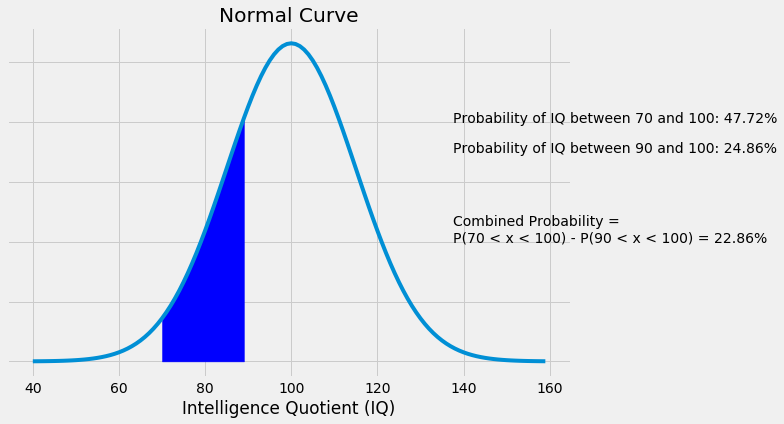

In [15]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')

x_1 = np.arange(70, 90, 1)
# x_2 = np.arange(120, mu + sigma * 4, 1)

y_1 = norm.pdf(x_1, mu, sigma)
# y_2 = norm.pdf(x_2, mu, sigma)

x_all = np.arange(mu - sigma * 4 ,
                  mu + sigma * 4,
                  1)
y_all = norm.pdf(x_all, mu, sigma)

ax.plot(x_all,y_all)
ax.fill_between(x_1,y_1,0,color='b')
# ax.fill_between(np.arange(70, mu+1, 1),norm.pdf(np.arange(70,mu+1,1),mu,sigma),0,color='b',alpha=0.3)
ax.set_xlabel('Intelligence Quotient (IQ)')
ax.set_yticklabels([])
ax.annotate("Probability of IQ between 70 and 100: {:.2f}%".format(p1 * 100), [mu + sigma * 2.5, 0.02])
ax.annotate("Probability of IQ between 90 and 100: {:.2f}%".format(p2 * 100), [mu + sigma * 2.5, 0.0175])
ax.annotate("Combined Probability = \nP(70 < x < 100) - P(90 < x < 100) = {:.2f}%".format(ans * 100), [mu + sigma * 2.5, 0.01])
ax.set_title('Normal Curve')
plt.show()

In [16]:
# Problem D
z1 = round(z_score(81,mu,sigma),2)
p1 = one_tail_z_table(z1)

ans = 0.5 - p1

# D) Find the probability that a random person will have an IQ below 81.
### Determine what sections you're looking at:
$$P(X < 81)$$
### Convert your values to Z-scores.
$$Z_{81}=\frac{X-mean}{standard\ deviation}=\frac{81-100}{15}=-1.27$$

### Find the P-values
$$P(Z < -1.27) = 50\% - 0.3980 = 0.1020$$

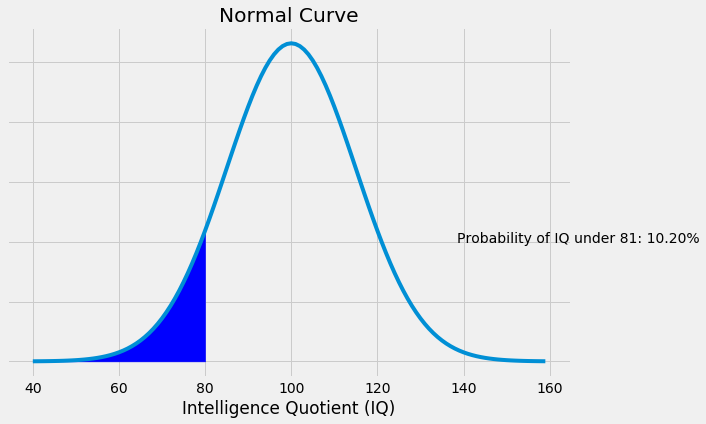

In [17]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')

x_1 = np.arange(mu - sigma * 4, 81, 1)
# x_2 = np.arange(120, mu + sigma * 4, 1)

y_1 = norm.pdf(x_1, mu, sigma)
# y_2 = norm.pdf(x_2, mu, sigma)

x_all = np.arange(mu - sigma * 4 ,
                  mu + sigma * 4,
                  1)
y_all = norm.pdf(x_all, mu, sigma)

ax.plot(x_all,y_all)
ax.fill_between(x_1,y_1,0,color='b')
# ax.fill_between(x_2,y_2,0,color='b')
ax.set_xlabel('Intelligence Quotient (IQ)')
ax.set_yticklabels([])
ax.annotate("Probability of IQ under 81: {:.2f}%".format(ans * 100), [mu+1 + sigma * 2.5, 0.01])
# ax.annotate("Probability of IQ over 120: {:.1f}%".format(p2 * 100), [mu + sigma * 2.5, 0.0175])
# ax.annotate("Combined Probability = {:.1f}%".format(ans * 100), [mu + sigma * 2.5, 0.01])
ax.set_title('Normal Curve')
plt.show()

In [18]:
# Problem E
import math
z1 = z_score(105,mu,sigma/round(math.sqrt(30),4))
# p1 = round(one_tail_z_table(z1),4)

ans = 0.0336

# print(ans)

# E) Find the probability that the average IQ from a sample size of 30 will be above 105.
### Determine what sections you're looking at:
$$P(X < 105)$$
$$standard\ deviation\ =\ \frac{\sigma}{\sqrt n}\ =\ \frac{15}{\sqrt 30}\ =\ 2.7386$$
### Convert your values to Z-scores.
$$Z_{105}=\frac{X-mean}{standard\ deviation}=\frac{105-100}{2.7386}=1.8257$$

### Find the P-values
$$P(Z > 1.8257) = 50\% - 0.4664 = 0.0336$$

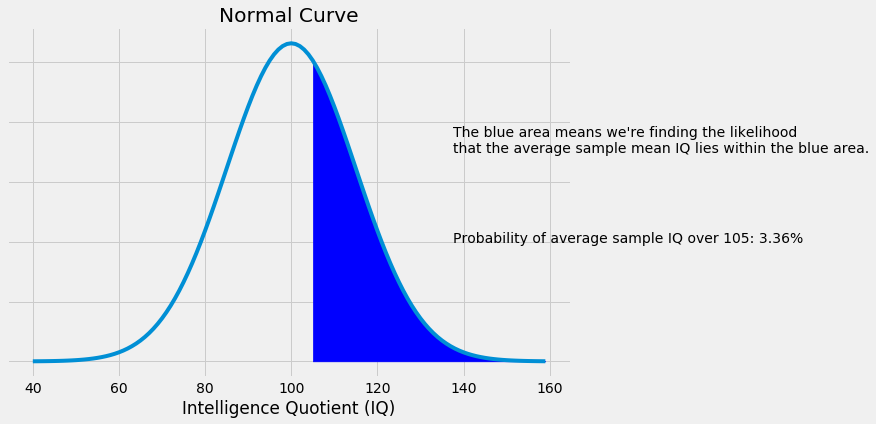

In [19]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')

# x_1 = np.arange(mu - sigma * 4, 90, 1)
x_2 = np.arange(105, mu + sigma * 4, 1)

# y_1 = norm.pdf(x_1, mu, sigma)
y_2 = norm.pdf(x_2, mu, sigma)

x_all = np.arange(mu - sigma * 4 ,
                  mu + sigma * 4,
                  1)
y_all = norm.pdf(x_all, mu, sigma)

ax.plot(x_all,y_all)
# ax.fill_between(x_1,y_1,0,color='b')
ax.fill_between(x_2,y_2,0,color='b')
ax.set_xlabel('Intelligence Quotient (IQ)')
ax.set_yticklabels([])
# ax.annotate("Probability of IQ under 90: {:.1f}%".format(p1 * 100), [mu + sigma * 2.5, 0.02])
ax.annotate("The blue area means we're finding the likelihood\nthat the average sample mean IQ lies within the blue area.".format(p2 * 100), [mu + sigma * 2.5, 0.0175])
ax.annotate("Probability of average sample IQ over 105: {:.2f}%".format(ans * 100), [mu + sigma * 2.5, 0.01])
ax.set_title('Normal Curve')
plt.show()

In [20]:
# Problem F
z1 = round(z_score(90,mu,sigma),2)
p1 = 0.5 - one_tail_z_table(z1)

z2 = round(z_score(120,mu,sigma),2)
p2 = 0.5 - one_tail_z_table(z2)

ans = p1 + p2

print(ans)

0.3432


# F) Find the probability that a random person will have an IQ below 90 or above 120.
### Determine what sections you're looking at:
$$P(X < 90\quad or\quad X > 120)$$
### Convert your values to Z-scores.
$$Z_{90}=\frac{X-mean}{standard\ deviation}=\frac{90-100}{15}=-0.67$$
# 
$$Z_{120}=\frac{X-mean}{standard\ deviation}=\frac{120-100}{15}=1.33$$
### Find the P-values
$$P(Z < -0.67 or Z > 1.33) = P(Z > 1.33) + P(Z < -0.67)$$$$=(50\%-0.4082)\ +\ (50\%-0.2486)$$$$=0.3432$$

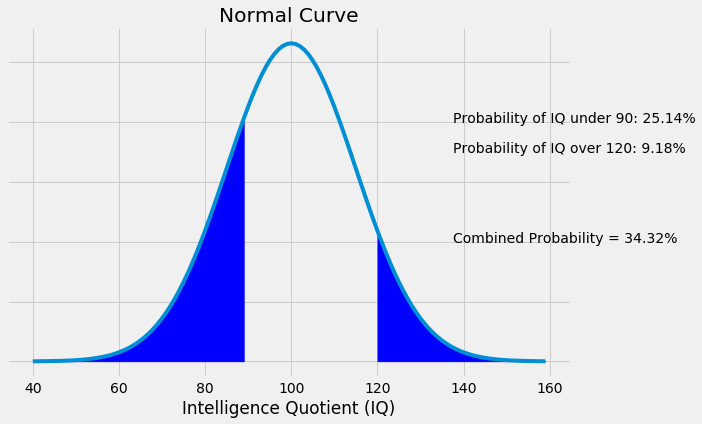

In [21]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')

x_1 = np.arange(mu - sigma * 4, 90, 1)
x_2 = np.arange(120, mu + sigma * 4, 1)

y_1 = norm.pdf(x_1, mu, sigma)

y_2 = norm.pdf(x_2, mu, sigma)

x_all = np.arange(mu - sigma * 4 ,
                  mu + sigma * 4,
                  1)
y_all = norm.pdf(x_all, mu, sigma)

ax.plot(x_all,y_all)
ax.fill_between(x_1,y_1,0,color='b')
ax.fill_between(x_2,y_2,0,color='b')
ax.set_xlabel('Intelligence Quotient (IQ)')
ax.set_yticklabels([])
ax.annotate("Probability of IQ under 90: {:.2f}%".format(p1 * 100), [mu + sigma * 2.5, 0.02])
ax.annotate("Probability of IQ over 120: {:.2f}%".format(p2 * 100), [mu + sigma * 2.5, 0.0175])
ax.annotate("Combined Probability = {:.2f}%".format(ans * 100), [mu + sigma * 2.5, 0.01])
ax.set_title('Normal Curve')
plt.show()

In [22]:
# Problem G
display(HTML("""<h1>Problem G</h1><p>95th percentile = top 5% = P-value of 0.95</p>
<p>Z-score of the P-value 0.95 = {0}</p>
<p>X value (aka cutoff point) of the P-value 95th percentile: Z = (X - mu) / sigma
</p><p>X = Z * sigma + mu
</p><p>X = 1.64 * 15 + 100
</p><p>= {1}</p>""".format(round(p_to_z(0.95),2),round(p_to_z(0.95),2) * sigma + mu)))
